In [3]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '/cellar/users/mikeyu/DeepTranslate/ddot')

import numpy as np
np.set_printoptions(linewidth=150)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import pandas as pd
import networkx as nx
import numpy as np

import ddot
from ddot import Ontology, ndex_to_sim_matrix, expand_seed, melt_square, make_seed_ontology, make_index

# Setup parameters

In [6]:
alpha = 0.05
beta = 0.5

In [4]:
seed = ['FANCA','FANCB', 'FANCC', 'BRCA2', 'FANCD2', 'FANCE',
        'FANCF', 'FANCG', 'FANCI', 'BRIP1', 'FANCL', 'FANCM', 'PALB2', 'RAD51C', 'SLX4', 'ERCC4', 'RAD51',
        'BRCA1', 'UBE2T', 'XRCC2']

In [5]:
ndex_user, ndex_pass = 'scratch', 'scratch'
ndex_server = 'http://test.ndexbio.org'

# Read Gene Ontology

In [6]:
go_human = Ontology.from_ndex(ddot.config.GO_HUMAN_URL)
print go_human

# Read gene similarity network

In [8]:
sim, sim_names = ndex_to_sim_matrix(
    ndex_uuid='d2dfa5cc-56de-11e7-a2e2-0660b7976219',
    similarity='similarity',
    input_fmt='cx_matrix',
    output_fmt='matrix',
    subset=None)
sim = pd.DataFrame(sim, columns=sim_names, index=sim_names)

## Rank transform the similarities

In [35]:
sim_rank = sim.rank(0) / (sim.shape[0] - 1)
sim_rank = pd.DataFrame((sim_rank.values + sim_rank.values.T) / 2.0, columns=sim_names, index=sim_names)

# Create FanGO

##  Use single function

## Use multiple functions

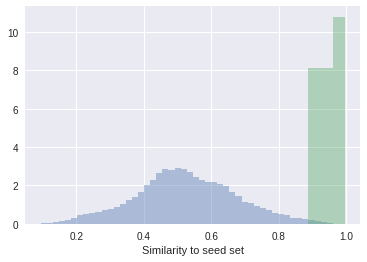

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=3)
plt.rcParams['svg.fonttype'] = 'none'

expand, expand_idx, sim_2_seed, fig = expand_seed(
    seed,
    sim_rank.values,
    sim_names,
    seed_perc=0,
    agg='mean',
    figure=True)

In [42]:
ont = Ontology.run_clixo(sim.loc[expand, :].loc[:, expand], alpha, beta, square=True)
ont

194 genes, 74 terms, 349 gene-term relations, 86 term-term relations
node_attributes: []
edge_attributes: ['CLIXO_score']

In [43]:
alignment = ont.align(go_human, 
                      iterations=100,
                      threads=40,
                      update_self=['Term_Description', 'Size'],
                      align_label='Term_Description',
                      verbose=True)

Common genes: 193
collapse command: /cellar/users/mikeyu/DeepTranslate/ddot/ddot/alignOntology/collapseRedundantNodes /tmp/tmpm6qmVD
collapse command: /cellar/users/mikeyu/DeepTranslate/ddot/ddot/alignOntology/collapseRedundantNodes /tmp/tmp8wNDN9
ont1_collapsed: 193 genes, 74 terms, 348 gene-term relations, 86 term-term relations
node_attributes: []
edge_attributes: ['CLIXO_score']
ont2_collapsed: 193 genes, 1854 terms, 3594 gene-term relations, 5039 term-term relations
node_attributes: ['Term_Description', 'Branch', 'Size']
edge_attributes: []
Alignment command: /cellar/users/mikeyu/DeepTranslate/ddot/ddot/alignOntology/calculateFDRs /tmp/tmpSFy36f /tmp/tmpfCRyJ2 0.05 criss_cross /tmp/tmpL1v4vZ 100 40 gene


In [45]:
ont.to_ndex(name='Fanconi Anemia Gene Ontology',
            ndex_server=ndex_server,
            ndex_user=ndex_user,
            ndex_pass=ndex_pass,
            visibility='PUBLIC',
            layout='bubble-collect',
            network=hnexo_data,
            features=hnexo_data.columns,
            main_feature='RF score',
            verbose=True)

Uploading 74 terms
0 No data provided for gene pairs in Term: CLIXO:194
1 No data provided for gene pairs in Term: CLIXO:195
2 No data provided for gene pairs in Term: CLIXO:196
3 Term: CLIXO:197 Gene pairs: 1 Genes: 2 Time: 0.1482 Upload time: 0.1449 NDEx URL: http://dev2.ndexbio.org/v2/network/9c569028-00d6-11e8-bd69-0660b7976219
4 Term: CLIXO:198 Gene pairs: 1 Genes: 2 Time: 0.1615 Upload time: 0.1554 NDEx URL: http://dev2.ndexbio.org/v2/network/9c6f484b-00d6-11e8-bd69-0660b7976219
5 Term: CLIXO:199 Gene pairs: 1 Genes: 2 Time: 0.1684 Upload time: 0.1623 NDEx URL: http://dev2.ndexbio.org/v2/network/9c8938ed-00d6-11e8-bd69-0660b7976219
6 Term: CLIXO:200 Gene pairs: 1 Genes: 2 Time: 0.167 Upload time: 0.1595 NDEx URL: http://dev2.ndexbio.org/v2/network/9ca2db6f-00d6-11e8-bd69-0660b7976219
7 Term: CLIXO:201 Gene pairs: 1 Genes: 2 Time: 0.16 Upload time: 0.1537 NDEx URL: http://dev2.ndexbio.org/v2/network/9cbb6c81-00d6-11e8-bd69-0660b7976219
8 No data provided for gene pairs in Term: CL

67 Term: CLIXO:261 Gene pairs: 5253 Genes: 131 Time: 1.5009 Upload time: 1.2855 NDEx URL: http://dev2.ndexbio.org/v2/network/a31bf59e-00d6-11e8-bd69-0660b7976219
68 Term: CLIXO:262 Gene pairs: 6903 Genes: 166 Time: 1.6268 Upload time: 1.3681 NDEx URL: http://dev2.ndexbio.org/v2/network/a411c750-00d6-11e8-bd69-0660b7976219
69 Term: CLIXO:263 Gene pairs: 7021 Genes: 176 Time: 1.7844 Upload time: 1.5299 NDEx URL: http://dev2.ndexbio.org/v2/network/a5227402-00d6-11e8-bd69-0660b7976219
70 Term: CLIXO:264 Gene pairs: 7021 Genes: 183 Time: 1.912 Upload time: 1.6547 NDEx URL: http://dev2.ndexbio.org/v2/network/a6434d5d-00d6-11e8-bd69-0660b7976219
71 Term: CLIXO:265 Gene pairs: 7021 Genes: 189 Time: 1.6123 Upload time: 1.3585 NDEx URL: http://dev2.ndexbio.org/v2/network/a73dda07-00d6-11e8-bd69-0660b7976219
72 Term: CLIXO:266 Gene pairs: 7021 Genes: 192 Time: 1.708 Upload time: 1.4508 NDEx URL: http://dev2.ndexbio.org/v2/network/a847a8eb-00d6-11e8-bd69-0660b7976219
73 Term: CLIXO:267 Gene pairs:

(u'http://dev2.ndexbio.org/v2/network/a9c28920-00d6-11e8-bd69-0660b7976219',
 <ndex.networkn.NdexGraph at 0x7fc2be5e9190>)

## 

In [ ]:
ont, url, ont_ndexgraph, expand_results = make_seed_ontology(
      sim,
      sim_names,
      build_kwargs={'alpha' : alpha,
                    'beta' : beta,
                    'method' : 'clixo'},
      expand_kwargs={'seed' : seed,
                     'sim': sim_rank.values,
                     'sim_names': sim_names,
                     'seed_perc':0,
                     'agg':'mean',
                     'figure':True},
      align_kwargs={'hier' : go_human,
                    'iterations':100,
                    'threads': 40,
                    'update_self': ['Term_Description', 'Size'],
                    'align_label' : 'Term_Description'},
      ndex_kwargs={'ndex_user':ndex_user,
                   'ndex_pass':ndex_pass,
                   'ndex_server':ndex_server,
                   'name' : 'Fanconi Anemia Gene Ontology (FanGO)',
                   'visible_term_attr': ['Aligned_Term',
                                         'Aligned_Similarity',
                                         'Aligned_FDR',
                                         'Aligned_Term_Description',
                                         'Aligned_Size',
                                         'Similarity_2_Seed'],
                   'subnet_max_term_size' : 0,
                   'visibility' : 'PUBLIC',
                   'layout' : 'bubble-collect',                  
                   'network' : hnexo_data,
                   'features' : hnexo_data.columns,
                   'main_feature' : 'RF score'},
      node_attr=gene_drug,
      verbose=True,
      ndex=True,
)
print url
print ont